In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
history = pd.read_hdf('./regelum_data/outputs/2024-04-04/21-08-38/0/.callbacks/HistoricalDataCallback/observations_actions_it_00010_ep_00008.h5')  

In [29]:
policy = pd.read_hdf('./regelum_data/outputs/2024-04-04/21-08-38/0/.callbacks/ObjectiveSaver/C. Policy objective. It 00010.h5')  

In [30]:
critic = pd.read_hdf('./regelum_data/outputs/2024-04-04/21-08-38/0/.callbacks/ObjectiveSaver/B. Critic objective. It 00010.h5')  

In [31]:
policy

,epoch_idx,objective
0,0,22.061695


In [32]:
critic

,epoch_idx,objective
0,0,3.305296e+14
1,1,3.305296e+14
2,2,3.305296e+14
3,3,3.305296e+14
4,4,3.305296e+14
5,5,3.305296e+14
6,6,3.305295e+14
7,7,3.305295e+14
8,8,3.305295e+14
9,9,3.305295e+14


In [33]:
history

,time,current_value,episode_id,iteration_id,running_objective_portfolio,running_objective_market,delta_volume_0,delta_volume_1,delta_volume_2,delta_volume_3,...,prev_volume_2,prev_volume_3,current_price_0 [USD],current_price_1 [USD],current_price_2 [USD],current_price_3 [USD],prev_price_0 [USD],prev_price_1 [USD],prev_price_2 [USD],prev_price_3 [USD]
0,0.00,7.905694e+06,8,10,1.581139e+08,-1.581139e+08,0.002667,-0.001780,0.024854,0.015821,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.05,7.905694e+06,8,10,1.013803e+00,-1.013803e+00,-0.062648,-0.012271,-0.041442,0.089937,...,1.000000,1.000000,1.004206,0.999937,1.008060,1.001751,1.000000,1.000000,1.000000,1.000000
2,0.10,7.905694e+06,8,10,1.839182e+00,-1.839182e+00,-0.043719,-0.086819,-0.012195,-0.007222,...,1.008060,1.001751,1.004867,0.999750,0.993916,1.005072,1.004206,0.999937,1.008060,1.001751
3,0.15,7.905694e+06,8,10,-2.208898e+00,2.208898e+00,0.096091,-0.016883,0.043892,-0.077825,...,0.993916,1.005072,1.008450,1.007147,0.996395,1.000921,1.004867,0.999750,0.993916,1.005072
4,0.20,7.905694e+06,8,10,5.952335e+00,-5.952335e+00,-0.031224,-0.075390,0.022759,-0.092392,...,0.996395,1.000921,1.003022,1.006815,0.991641,0.996838,1.008450,1.007147,0.996395,1.000921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,6.85,7.905298e+06,8,10,-5.307993e+01,5.307993e+01,-0.014427,-0.003099,0.027359,0.100729,...,1.058804,0.919554,0.912235,1.128083,1.051251,0.916206,0.916051,1.120210,1.058804,0.919554
138,6.90,7.905298e+06,8,10,5.048711e+00,-5.048711e+00,-0.011855,-0.064906,-0.043015,-0.019491,...,1.051251,0.916206,0.920662,1.125956,1.033728,0.908491,0.912235,1.128083,1.051251,0.916206
139,6.95,7.905298e+06,8,10,-2.577329e+00,2.577329e+00,0.051887,-0.044401,0.053159,0.029850,...,1.033728,0.908491,0.918542,1.127934,1.017258,0.894525,0.920662,1.125956,1.033728,0.908491
140,7.00,7.905255e+06,8,10,-1.233473e+03,1.233473e+03,-0.050693,0.042987,-0.036164,-0.005730,...,1.017258,0.894525,0.917771,1.127376,1.016566,0.896541,0.918542,1.127934,1.017258,0.894525


In [38]:
history[['cash share', 'share_0', 'share_1', 'share_2', 'share_3']]

,cash share,share_0,share_1,share_2,share_3
0,0.200000,0.200000,0.200000,0.200000,0.200000
1,0.199028,0.199470,0.199425,0.199691,0.199601
2,0.199704,0.199256,0.199715,0.199689,0.200912
3,0.200831,0.198454,0.198482,0.199201,0.200471
4,0.200971,0.199992,0.198890,0.200219,0.200275
...,...,...,...,...,...
137,0.203974,0.194635,0.155200,0.228373,0.221912
138,0.203650,0.195393,0.155890,0.229712,0.223968
139,0.206463,0.196681,0.156350,0.230929,0.225383
140,0.205402,0.197263,0.155935,0.231532,0.225747


In [18]:
history.columns

Index(['time', 'current_value', 'episode_id', 'iteration_id',
       'running_objective_portfolio', 'running_objective_market',
       'delta_volume_0', 'delta_volume_1', 'delta_volume_2', 'delta_volume_3',
       'drift_0', 'drift_1', 'drift_2', 'drift_3', 'volatility_0',
       'volatility_1', 'volatility_2', 'volatility_3', 'corr_0_1', 'corr_0_2',
       'corr_0_3', 'corr_1_2', 'corr_1_3', 'corr_2_3', 'cash share', 'share_0',
       'share_1', 'share_2', 'share_3', 'returns_0', 'returns_1', 'returns_2',
       'returns_3', 'cash [USD]', 'first_momentum', 'second_momontum',
       'current_volume_0', 'current_volume_1', 'current_volume_2',
       'current_volume_3', 'prev_volume_0', 'prev_volume_1', 'prev_volume_2',
       'prev_volume_3', 'current_price_0 [USD]', 'current_price_1 [USD]',
       'current_price_2 [USD]', 'current_price_3 [USD]', 'prev_price_0 [USD]',
       'prev_price_1 [USD]', 'prev_price_2 [USD]', 'prev_price_3 [USD]'],
      dtype='object')

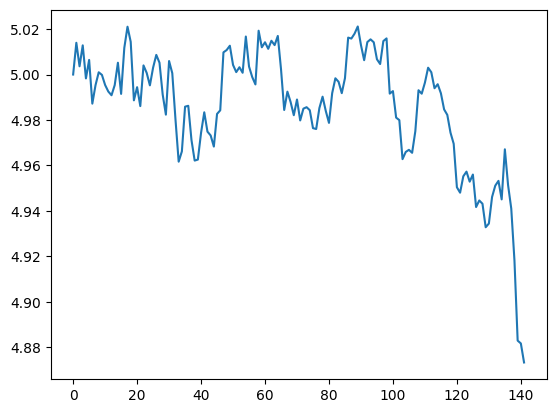

In [34]:
plt.plot(history['current_price_0 [USD]']*history['current_volume_0'] +
         history['current_price_1 [USD]']*history['current_volume_1']+
         history['current_price_2 [USD]']*history['current_volume_2']+
         history['current_price_3 [USD]']*history['current_volume_3']+
         history['cash [USD]'])